In [1]:
# Importing required libraries
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('used_cars_preprocessed.csv')

In [3]:
# Random sample of the dataset
df.sample(5)

,brand,model,model_year,engine_volume,engine_type,transmission,fuel_type,ext_col,mileage in miles,damage,price_usd
1350,Toyota,Land Cruiser Base,1996,NaN,NaN,automatic,Diesel,blue,233000,None reported,7500
585,Volkswagen,Eurovan MV,2001,2.8,V6,automatic,Gasoline,blue,111887,None reported,14000
2053,Other,Romeo Giulia Base,2017,2.0,4Cyl,automatic,Gasoline,red,48000,None reported,20500
1220,Hyundai,Tucson Limited,2016,1.6,4Cyl,7-speed auto,Gasoline,NaN,138000,None reported,10990
2144,Lexus,CT 200h Premium,2014,1.8,4Cyl,automatic,Hybrid,NaN,131200,None reported,14000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3998 non-null   object 
 1   model             3998 non-null   object 
 2   model_year        3998 non-null   int64  
 3   engine_volume     3948 non-null   float64
 4   engine_type       3617 non-null   object 
 5   transmission      3998 non-null   object 
 6   fuel_type         3828 non-null   object 
 7   ext_col           3602 non-null   object 
 8   mileage in miles  3998 non-null   int64  
 9   damage            3885 non-null   object 
 10  price_usd         3998 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 343.7+ KB


In [5]:
# Divide the dataset into categorical and numerical data for plotting
categorical_features = df.select_dtypes(include=["object", "category"]).columns.to_list()
numerical_features = df.select_dtypes(include=["number"]).columns.to_list()
print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['brand', 'model', 'engine_type', 'transmission', 'fuel_type', 'ext_col', 'damage']
Numerical features: ['model_year', 'engine_volume', 'mileage in miles', 'price_usd']


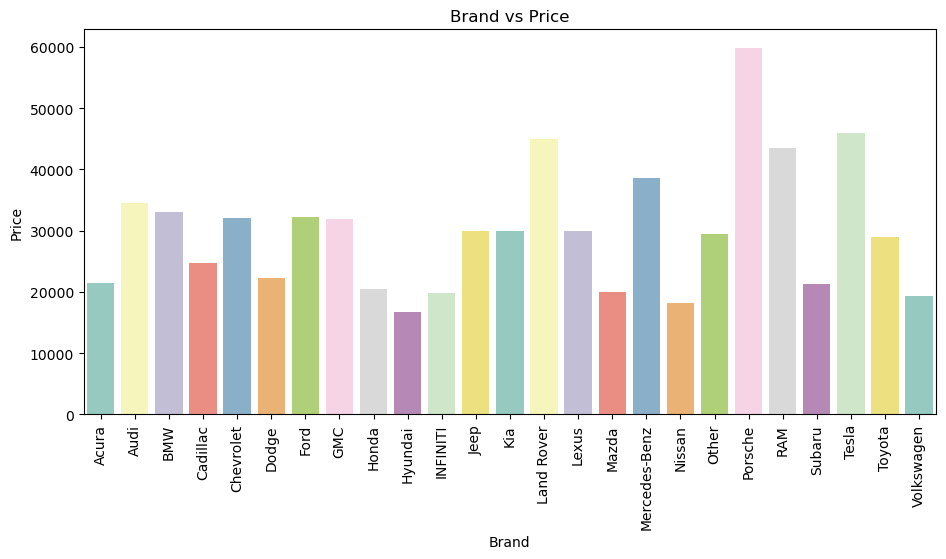

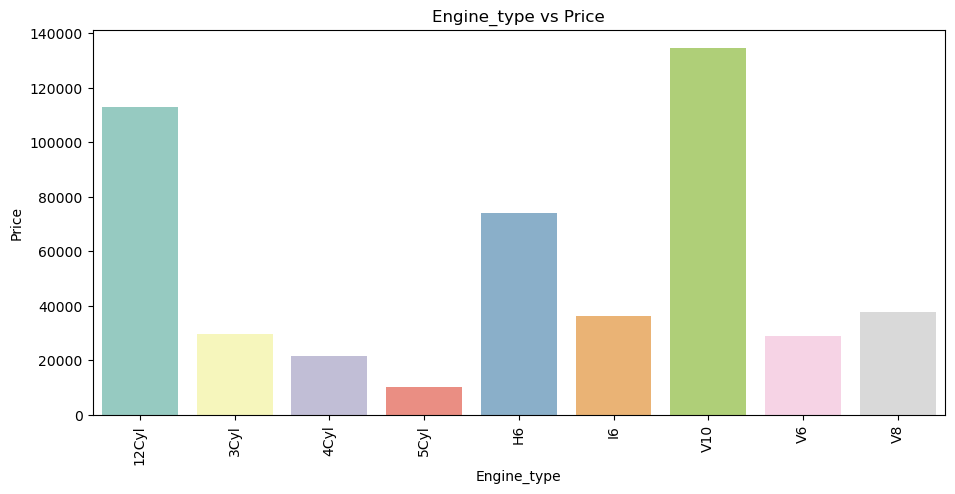

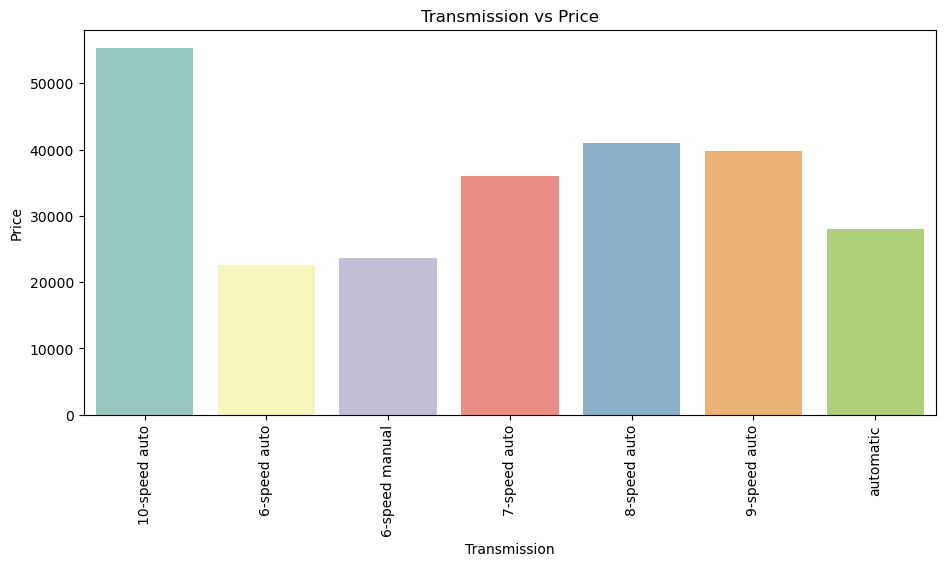

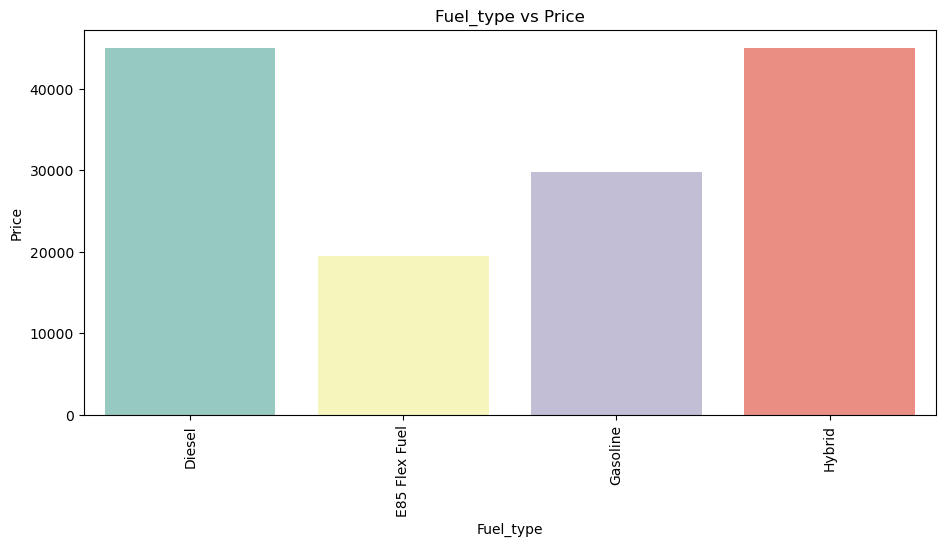

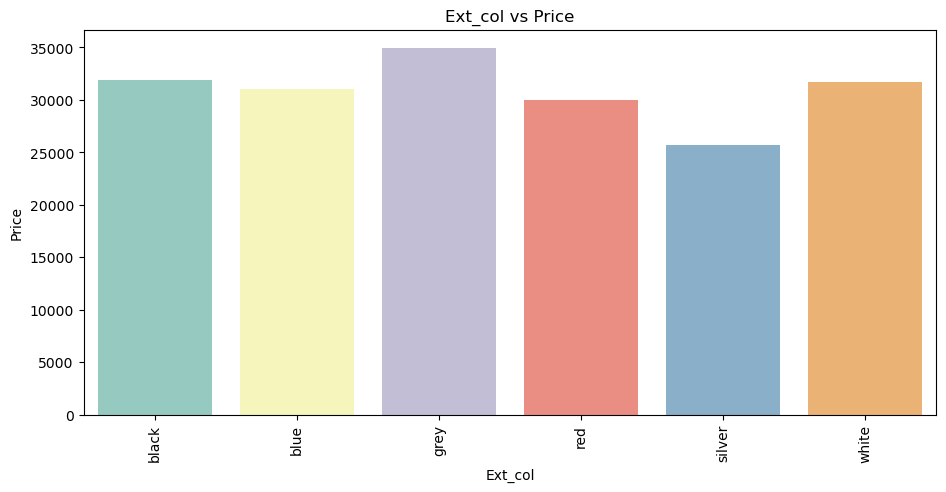

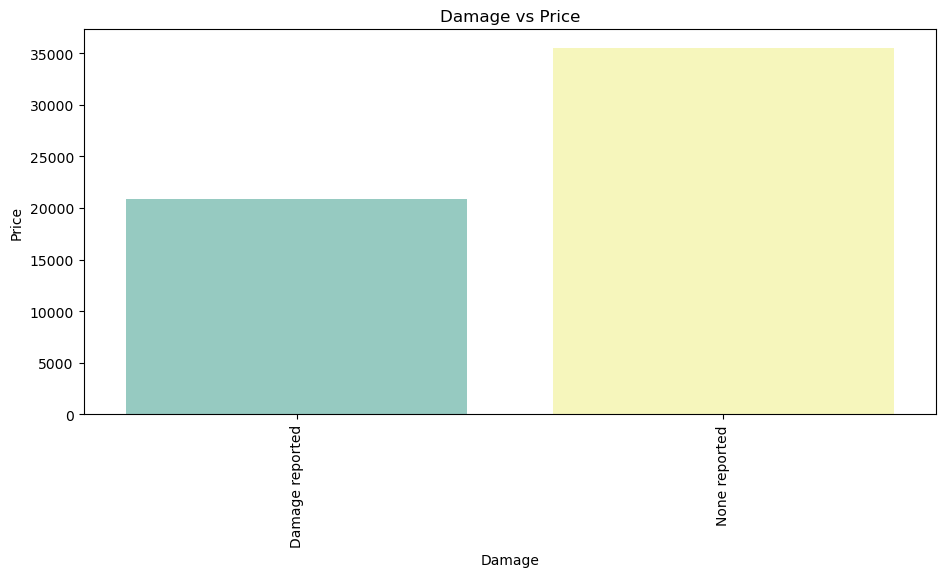

In [6]:
# Categorical/Discrete plots

for feature in categorical_features:
    if feature not in ["model"]:
        plt.figure(figsize=(11,5))
        category_price = df.groupby(feature)["price_usd"].median()
        sns.barplot(x=category_price.index, y=category_price.values, hue=category_price.index, palette="Set3")
        plt.xticks(rotation=90)
        plt.xlabel(feature.capitalize())
        plt.ylabel("Price")
        plt.title(f"{feature.capitalize()} vs Price")
        plt.show()

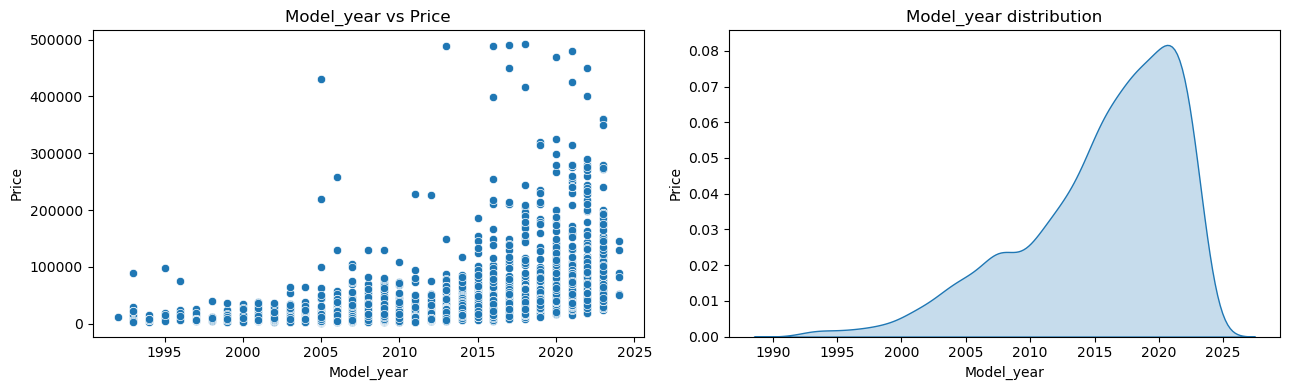

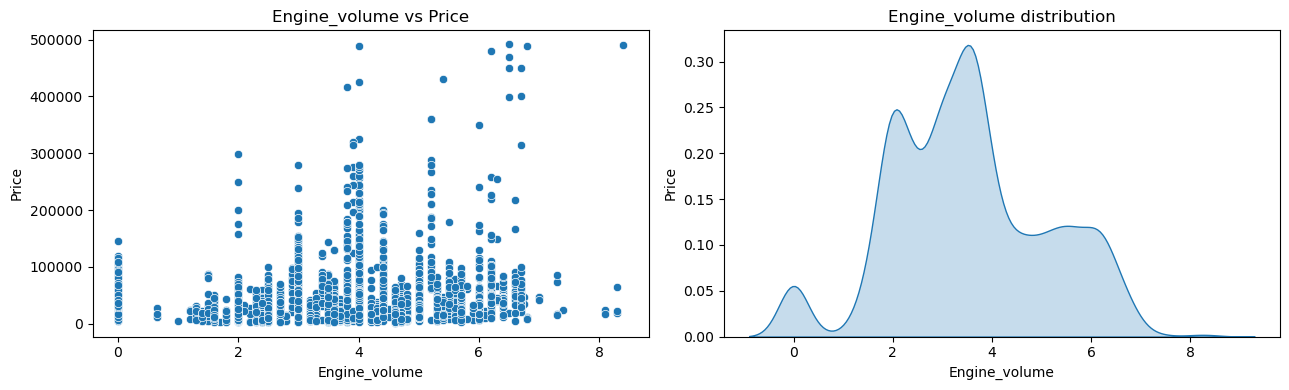

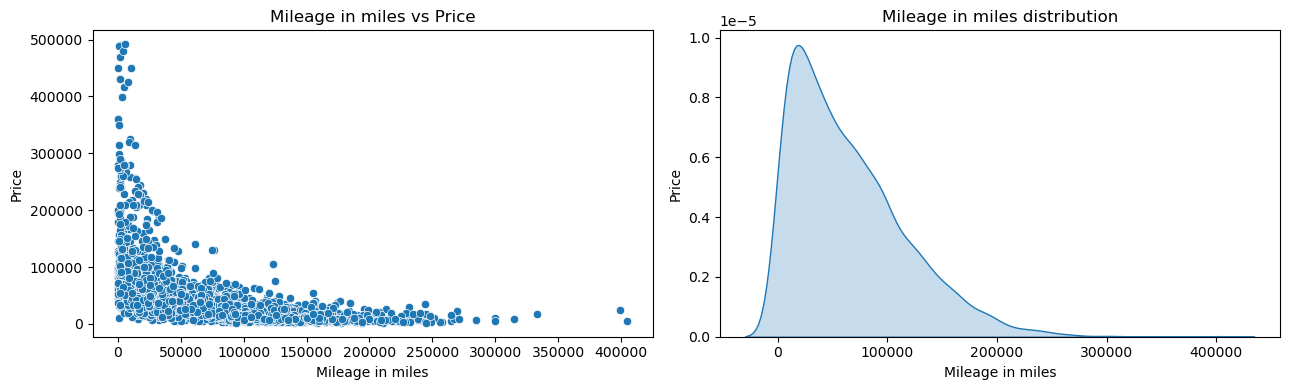

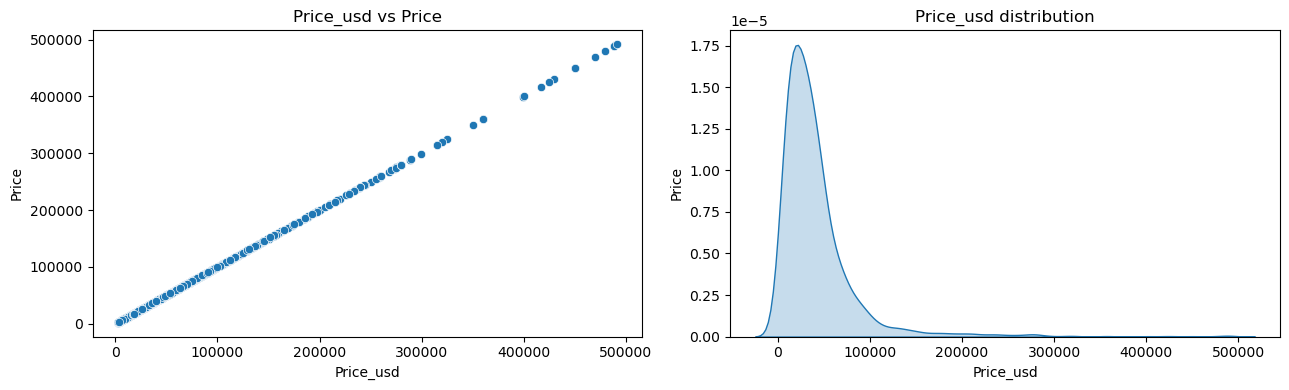

In [7]:
# Scatter and density plots

for feature in numerical_features:
        
        fig, ax = plt.subplots(1, 2, figsize = (13,4))

        sns.scatterplot(x=feature, y="price_usd", data=df, ax=ax[0])
        #plt.xticks(rotation=90)
        ax[0].set_xlabel(feature.capitalize())
        ax[0].set_ylabel("Price")
        ax[0].set_title(f"{feature.capitalize()} vs Price")

        
        sns.kdeplot(df[feature], fill=True, ax=ax[1])
        #plt.xticks(rotation=90)
        ax[1].set_xlabel(feature.capitalize())
        ax[1].set_ylabel("Price")
        ax[1].set_title(f"{feature.capitalize()} distribution")

        plt.tight_layout()
        plt.show()

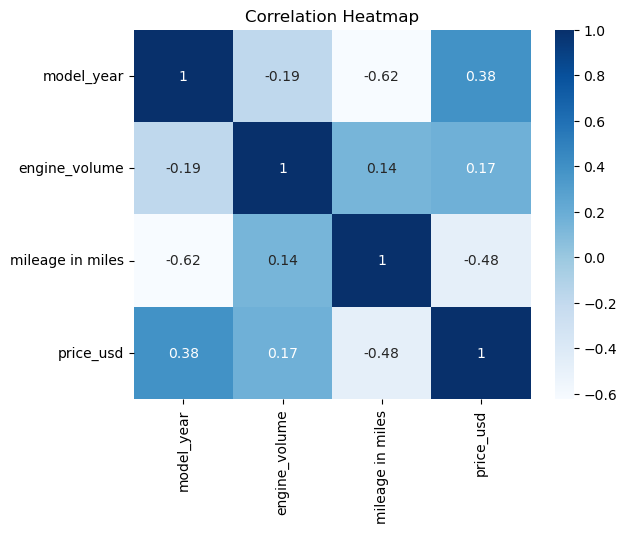

In [8]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Checking for multicollinearity: Variance Inflation Factor (VIF) 

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
# Filling missing data temorarily for checking VIF
temp_df = df[numerical_features]
temp_df = temp_df.fillna(temp_df.median())
temp_df.isna().sum()

model_year          0
engine_volume       0
mileage in miles    0
price_usd           0
dtype: int64

In [11]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data['variable'] = temp_df.columns
vif_data['VIF'] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]
vif_data['tolerance'] = 1/vif_data['VIF']

vif_data

,variable,VIF,tolerance
0,model_year,8.391948,0.119162
1,engine_volume,6.745772,0.148241
2,mileage in miles,3.490359,0.286503
3,price_usd,2.579988,0.387599


There are high VIF value for model_year and engine_volume, we will use model_year in model pipeline.